In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import defaultdict
sns.set(style="darkgrid")

/home/ruben/anaconda2/envs/deepatariEnv/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Could use 18 runs from expected 20
len(evalUsedBudgets) 153 --> <type 'list'> 18


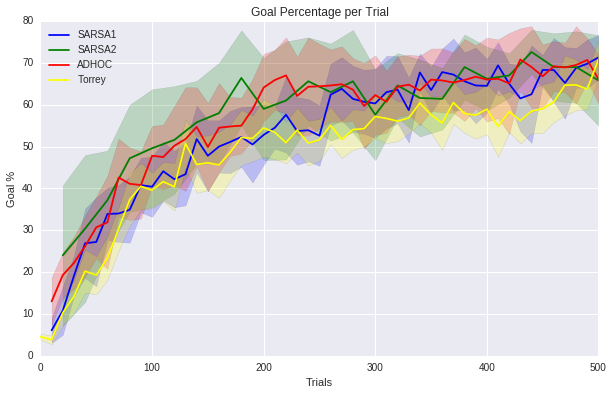

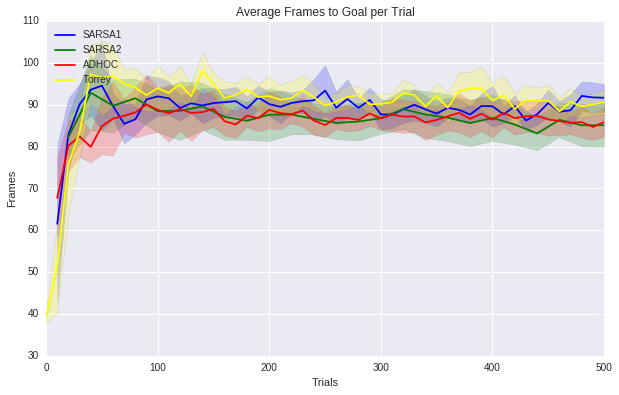

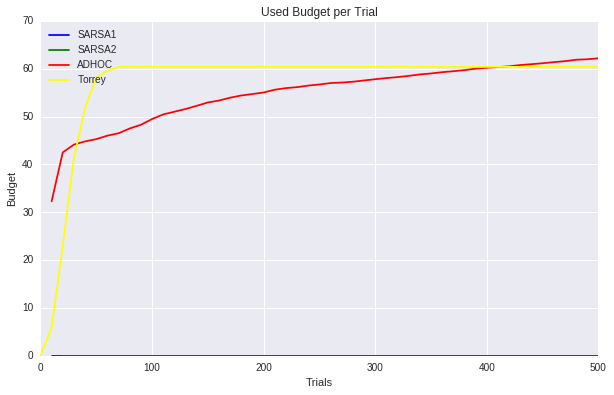

In [2]:
#from exp_utils import collect_experiment_data, summarize_experiment_data
import exp_utils
source1 = '/home/ruben/playground/HFO/experiments/testResultFiles/2016_09_12-10.42.14_SARSA_1_10'
source2 = '/home/ruben/playground/HFO/experiments/testResultFiles/SARSA'
source3 = '/home/ruben/playground/HFO/experiments/testResultFiles/AdHocVisit'
#source4 = '/home/ruben/playground/HFO/experiments/testResultFiles/AdHocVisit'
source4 = '/home/ruben/playground/HFO/experiments/testResultFiles/2016_09_12-21.15.35_Torrey_1_20'
exp_utils.collect_experiment_data(source4, runs = 20)
exp_utils.summarize_experiment_data(source4)
exp_utils.draw_graph(source1=source1, source2=source2, source3=source3, source4=source4,
                     name1="SARSA1", name3="ADHOC", name2="SARSA2", name4="Torrey")
exp_utils.draw_graph(source1=source1, source2=source2, source3=source3, source4=source4,
                     name1="SARSA1", name3="ADHOC", name2="SARSA2", name4="Torrey", what="__SUMMARY_goaltimes")
exp_utils.draw_graph(source1=source1, source2=source2, source3=source3, source4=source4,
                     name1="SARSA1", name3="ADHOC", name2="SARSA2", name4="Torrey", what="__SUMMARY_budgets")

In [ ]:
for run in range(1,21):
    for agent in range(1,4):
        with open('/home/ruben/playground/HFO/experiments/testResultFiles/2016_09_12-21.15.35_Torrey_1_20/_0_'+str(run)+'_AGENT_'+str(agent)+'_RESULTS_eval') as f: 
            lines = f.readlines()
            if len(lines) != 52:
                print ('Not enough lines in: _0_%d_AGENT_%d_RESULTS_eval' % (run, agent))
            for line in lines:
                if len(line.split(',')) != 4:
                    print('Not enough values in file:  _0_%d_AGENT_%d_RESULTS_eval' % (run, agent))

#with open('/home/ruben/playground/HFO/experiments/testResultFiles/AdHocVisit/__EVAL_goaltimes') as f:
#with open('/home/ruben/playground/HFO/experiments/testResultFiles/2016_09_12-21.15.35_Torrey_1_20/__EVAL_goaltimes') as f:
#    lines = f.readlines()
    
#for line in lines:
#    print(len(line.split(',')))

In [ ]:
'''
from collections import defaultdict
data = defaultdict(list)
#data[(10,0)] = []
data[(10,0)].append(1)
data[(10,0)].append(2)
print data[(10,0)]
'''
a = np.array([1,2])
b = np.array([])
print sum(a.shape)
for i in range(sum(a.shape)):
    #print i
    print a[i]
    
import csv
with open('eggs.csv', 'wb') as csvfile:
    spamwriter = csv.writer(csvfile)
    spamwriter.writerow("bla,bla,bla")
    spamwriter.writerow(("bla,bla,bla"))
    spamwriter.writerow(("bla","bla","bla"))
    blub = ["bla","bla","bla"]
    spamwriter.writerow((blub))
    spamwriter.writerow(("bla", blub))
    

In [ ]:
filenames = [None] * 3
filenames[0] = '/home/ruben/playground/HFO/experiments/LOGS/2016_09_09-17.18.41_SARSA/SARSA_1_7_eval'
filenames[1] = '/home/ruben/playground/HFO/experiments/LOGS/2016_09_09-16.33.51_SARSA/SARSA_1_7_eval'
filenames[2] = '/home/ruben/playground/HFO/experiments/LOGS/2016_09_09-16.15.18_SARSA/SARSA_1_7_eval'
t = []
gp = []
tg = []
b = []
for filename in filenames:
    _t, _gp, _tg, _b = np.loadtxt(open(filename, "rb"), skiprows=1, delimiter=",", unpack=True)
    #print("trials:\n%s" % str(trials))
    #print("goalPercentage:\n%s" % str(goalPercentage))
    #print("timeToGoal:\n%s" % str(timeToGoal))
    #print("budget:\n%s" % str(budget))
    t.append(_t)
    gp.append(_gp)
    tg.append(_tg)
    b.append(_b)
t = np.asarray(t)
gp1 = np.asarray(gp)
gp2 = gp1+10
gp3 = gp1-10
tg = np.asarray(tg)
b = np.asarray(b)


In [ ]:
X = t[0]
Y1, Y2, Y3 = gp1[0],gp2[0],gp3[0]
Y4, Y5, Y6 = gp1[1],gp2[1],gp3[1]
Y7, Y8, Y9 = gp1[2],gp2[2],gp3[2]

plt.figure(figsize=(10,6), dpi=80)
plt.xlim(0, X.max()*1.05)
plt.fill_between(X, Y1, Y2, facecolor='blue', alpha=0.2)
plt.fill_between(X, Y1, Y3, facecolor='blue', alpha=0.2)
plt.plot(X,Y1,label='gp1', color='blue')

plt.fill_between(X, Y4, Y5, facecolor='green', alpha=0.2)
plt.fill_between(X, Y4, Y6, facecolor='green', alpha=0.2)
plt.plot(X,Y4,label='gp2', color='green')

plt.fill_between(X, Y7, Y8, facecolor='red', alpha=0.2)
plt.fill_between(X, Y7, Y9, facecolor='red', alpha=0.2)
plt.plot(X,Y7,label='gp3', color='red')

plt.title('Goal Percentage per Trial')
plt.legend(loc='upper left')
plt.xlabel('Trials')
plt.ylabel('Goal %')

plt.show()

In [ ]:
X = t[0]
Y1, Y2, Y3 = tg[0], tg[1], tg[2]


plt.figure(figsize=(10,6), dpi=80)
plt.xlim(0, X.max()*1.05)
plt.plot(X,Y1,label='tg1', color='blue')
plt.plot(X,Y2,label='tg2', color='green')
plt.plot(X,Y3,label='tg3', color='red')

plt.title('Time to Goal per Trial')
plt.legend(loc='upper left')
plt.xlabel('Trials')
plt.ylabel('Time to Goal')

plt.show()

In [ ]:
filename = '/home/ruben/playground/HFO/experiments/LOGS/2016_09_09-17.18.41_SARSA/SARSA_1_7_eval'
trials, goalPercentage, timeToGoal, budget = numpy.loadtxt(open(filename, "rb"), skiprows=1, delimiter=",", unpack=True)
print("trials:\n%s" % str(trials))
print("goalPercentage:\n%s" % str(goalPercentage))
print("timeToGoal:\n%s" % str(timeToGoal))
print("budget:\n%s" % str(budget))

In [ ]:
import seaborn as sns
import pandas as pd
sns.set(style="darkgrid")

gammas = sns.load_dataset("gammas")
print type(gammas)
print type(trials)

goalPercentage2 = goalPercentage + 10
goalPercentage3 = goalPercentage - 10
myDict = {'date': trials, 'gp1': goalPercentage, 'gp2': goalPercentage2, 'gp3': goalPercentage3}
myDF = pd.DataFrame(myDict)
print myDF

myDFM = pd.melt(myDF, id_vars=['date','sub'], value_vars=['gp1', 'gp2', 'gp3'])


#myDF.set_index('date').plot()

#data = [goalPercentage,goalPercentage2,goalPercentage3]

sns.tsplot(data=myDF, ci=[0,100], time='date', value='gp3')

In [ ]:
import numpy as np
N=100

num_runs = 3
out = []
for k in range(num_runs):
    data = np.random.rand(N,3) + np.sin(np.arange(N)/5)[:,np.newaxis]
    data = np.hstack([np.arange(N)[:,np.newaxis],data])
    data = np.hstack([np.zeros(N)[:,np.newaxis]+k,data])
    out.append(data)

print type(out), len(out), type(out[0]), out[0].shape
    
data = np.vstack(out)

print type(data), data.shape

df = pd.DataFrame(data, columns=['sub','t', 'x', 'y', 'z'])
df

dfm = pd.melt(df, id_vars=['t','sub'], value_vars=['x', 'y', 'z'])
dfm
sns.tsplot(time='t', 
           value='value', 
           condition='variable', 
           data=dfm,
           err_style="boot_traces", 
           unit='sub',
           n_boot=50)